# Everymind - FireData
Neste notebook, apresentamos a descrição do processo de desenvolver um modelo preditivo de classificação capaz de identificar quais funcionários têm tendências a sair ou permanecer na empresa.

# Integrantes

*   Alexandre Fonseca de Souza
*   Bruno Otavio Bezerra de Meira
*   Filipi Enzo Siqueira Kikuchi
*   Gabriela de Morais da Silva
*   João Pedro Sartori Garcia de Alcaraz
*   Lucas Conti Pereira
*   Sofia Moreiras Pimazzoni


Primeiramente, utilizaremos o arquivo que contém a base de dados dos colaboradores para a future engineering.

#1.Preparação do algoritmo
Para que o algoritmo funcione da forma desejada, primeiro instalamos e importamos funções e bibliotecas que auxiliam na execução de algumas tarefas. Todas as importações estão listadas abaixo:

In [65]:
# Instalando o moment
!pip install moment

# Importação de bibliotecas
# Pandas
import pandas as pd

# scikitlearn
from sklearn.preprocessing import LabelEncoder

# Datetime
from datetime import datetime
from datetime import date

# Moment
import moment
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz 
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ConfusionMatrix


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


1.1 Importação dos dados
Para que o algoritmo consiga performar, precisamos importar o arquivo contendo os dados, a fim de tratá-los e posteriormente fazer analises mais acuradas. Como possuímos três tabelas com dados diferentes, separamo-nos em 3 dataframes diferentes.

In [66]:
# Importando o arquivo que contém a base de dados

# Dataframe da tabela "Everymind"
df_everymind = pd.read_excel('/content/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx', sheet_name = "Everymind")

# Dataframe da tabela "Reconhecimento"
df_reconhecimento = pd.read_excel('/content/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx', sheet_name = "Reconhecimento")

# Dataframe da tabela "Reconhecimento"
df_ambiente = pd.read_excel('/content/Base Colaboradores Everymind_Inteli_2020 a 2022vModelo Preditivo.xlsx', sheet_name = "Ambiente de Trabalho 27.07")

# 2.Remover ou substituir registros em branco

In [67]:
#------------------------------------Tabela Everymind--------------------------

# Verifica se dentro da coluna "Dt Saisa" tem cédulas vazias e caso tenha, adiciona a data de hoje.
df_saida = df_everymind['Dt Saida'].isnull()

for i in range(0,len(df_saida)):
  if df_saida[i] == True:
    df_everymind['Dt Saida'][i] = pd.Timestamp.today()

# Verifica se dentro da coluna "Tipo Saida" tem cédulas vazias e caso tenha, adciona "ColaboradorAtivo".

df_tipo_bool = df_everymind['Tipo Saida'].isnull()
df_tipo_aux = df_everymind['Tipo Saida']

for i in range(0,len(df_tipo_bool)):
  if df_tipo_bool[i] == True:
    df_tipo_bool[i] = "ColaboradorAtivo"
  if df_tipo_bool[i] == False: 
    df_tipo_bool[i] = (df_tipo_aux[i])

df_everymind['Tipo Saida'] = df_tipo_bool
#------------------------------------Tabela Ambiente de trabalho--------------------------

# Verifica se dentro das colunas de porcentagem de satisfação tem cédulas vazias e caso tenha, adiciona o 0.
keywords = ['Pulou', 'Muito Insatisfeito', 'Insatisfeito', 'Neutro', 'Satisfeito', 'Muito Satisfeito']

for i in keywords:
  
  df_ambiente_satisfaction = df_ambiente[i].isnull()

  for j in range(0,len(df_ambiente_satisfaction)):
    if df_ambiente_satisfaction[j] == True:
      df_ambiente[i][j] = "0"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#3. Formatação
 Nesta seção, vamos tratar os dados a fim de padronizá-los para que sejam aceitos e melhor utilizados pelo algoritmo a partir de funções que modificam a forma do dado. No momento, estamos trabalhando com alguns tipos de dados, sendo eles:



*   Dados relacionadas a tempo e numeros
*   Dados relaciondados a nome



3.1 Variáveis relacionadas a tempo e numeros
As manipulações para dados do tipo data envolvem a conversão do formato para o padrão "YYYY-MM-DD" (Ex: 2020-09-14) e a inclusão de valores em cédulas vazias para efeitos de cálculo (Na coluna "Dt Saida", quando não consta a data de saída, atribuimos o dia atual para podermos calcular o número de dias na empresa). Sofrem essa alteração os dados presentes nas colunas "Dt Admissao", "Dt Nascimento" e "Dt Saida". As transformações seguem abaixo:

In [68]:
#------------------------------------Tabela Everymind--------------------------

# Formata a data de admissao no formato ano/mes/dia
for i in range(0, len(df_everymind['Dt Admissao'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('00:00:00', '')
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('/', '-')
    df_everymind['Dt Admissao'][i] = moment.date(df_everymind['Dt Admissao'][i]).format("YYYY-MM-DD")

  if df_everymind['Tipo Saida'][i] != "ColaboradorAtivo":
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('00:00:00', '')
    df_everymind['Dt Admissao'][i] = str(df_everymind['Dt Admissao'][i]).replace('/', '-')
    df_everymind['Dt Admissao'][i] = moment.date(df_everymind['Dt Admissao'][i]).format("YYYY-MM-DD")

df_everymind['Dt Admissao'] = pd.to_datetime(df_everymind['Dt Admissao'], format="%Y/%m/%d")

# Formata a data de nascimento no formato ano/mes/dia

for i in range(0, len(df_everymind['Dt Nascimento'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Dt Nascimento'][i] = moment.date(df_everymind['Dt Nascimento'][i]).format("YYYY-MM-DD")
  if df_everymind['Tipo Saida'][i] != "ColaboradorAtivo":
    df_everymind['Dt Nascimento'][i] = moment.date(df_everymind['Dt Nascimento'][i]).format("YYYY-MM-DD")

df_everymind['Dt Nascimento'] = pd.to_datetime(df_everymind['Dt Nascimento'], format="%Y/%m/%d")


# Formata a data de saída, sendo que se o valor for vazio, atribui a data atual como data de saída

df_everymind['Dt Saida'] = pd.to_datetime(df_everymind['Dt Saida'], format="%Y/%m/%d")

#------------------------------------Tabela Reconhecimento--------------------------

# Coloca a coluna "Data de Admissao" no formato ano/mes/dia

for i in range(0, len(df_reconhecimento['Data de Admissão'])):

  df_reconhecimento['Data de Admissão'][i] = str(df_reconhecimento['Data de Admissão'][i]).replace('00:00:00', '')
  df_reconhecimento['Data de Admissão'][i] = str(df_reconhecimento['Data de Admissão'][i]).replace('/', '-')
  df_reconhecimento['Data de Admissão'][i] = moment.date(df_reconhecimento['Data de Admissão'][i]).format("YYYY-MM-DD")

df_reconhecimento['Data de Admissão'] = pd.to_datetime(df_reconhecimento['Data de Admissão'], format="%Y/%m/%d")

# Formata a data de Vigência no formato ano/mes/dia
for i in range(0, len(df_reconhecimento['Data Vigência'])):
  
  df_reconhecimento['Data Vigência'][i] = str(df_reconhecimento['Data Vigência'][i]).replace('00:00:00', '')
  df_reconhecimento['Data Vigência'][i] = str(df_reconhecimento['Data Vigência'][i]).replace('/', '-')
  df_reconhecimento['Data Vigência'][i] = moment.date(df_reconhecimento['Data Vigência'][i]).format("YYYY-MM-DD")

df_reconhecimento['Data Vigência'] = pd.to_datetime(df_reconhecimento['Data Vigência'], format="%Y/%m/%d")


#------------------------------------Tabela Ambiente de trabalho--------------------------


for i in keywords:
  for j in range(0,len(df_ambiente[i])):
    df_ambiente[i][j] = df_ambiente[i][j].replace('%', '')
  df_ambiente[i] = df_ambiente[i].astype(float)
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/l

##3.2 Variáveis relacionadas a nomes

Para que o programa funcione corretamente, todos os dados que contêm nomes e/ou informações baseadas em texto foram padronizados removendo todos os espaços em branco (Exemplo: "Funcional Pl" vira "FuncionalPl").



In [69]:
# ------------------------------------Tabela Everymind--------------------------


# Pega todas as colunas do dataframe com type "object" e tira todos os espaços em branco
dtg = df_everymind.select_dtypes(include = "object").columns

for j in dtg:
  df_everymind[j] = df_everymind[j].str.replace(' ', '')

for i in df_everymind:
  df_everymind[j] = df_everymind[j].str.replace('-', '')
# Cria uma coluna nova

df_everymind['PessoaColaboradora'] = ""

#Pega a coluna "Nome completo" tira o texto, deixa apenas o número do colaborador e adiciona na coluna criada "PessoaColaboradora" 

for i in range(0, len(df_everymind['Nome Completo'])):
  df_everymind['PessoaColaboradora'][i] = str(df_everymind['Nome Completo'][i]).replace('PessoaColaboradora', '')


# ------------------------------------Tabela Reconhecimento--------------------------


# Pega todas as colunas com type "object" e tira todos os espaços para ficar padronizado
df_reconhecimento_types = df_reconhecimento.select_dtypes(include = "object").columns

for j in df_reconhecimento_types:
  df_reconhecimento[j] = df_reconhecimento[j].str.replace(' ', '')

for i in df_reconhecimento:
  df_reconhecimento[j] = df_reconhecimento[j].str.replace('-', '')

# Cria uma nova coluna "Pessoa colaboradora"
df_reconhecimento['PessoaColaboradora'] = ""

# Transforma a coluna "Codinome" em number, tirando os textos e colocando o numero do colaborador na coluna "PessoaColaboradora"
for i in range(0, len(df_reconhecimento['Codinome'])):
  df_reconhecimento['PessoaColaboradora'][i] = str(df_reconhecimento['Codinome'][i]).replace('PessoaColaboradora', '')


# ------------------------------------Tabela Ambiente de Trabalho 27.07--------------------------


# Pega todas as colunas com type "object" e tira todos os espaços para ficar padronizado
df_ambiente_types = df_ambiente.select_dtypes(include = "object").columns

for j in df_ambiente_types:
  df_ambiente[j] = df_ambiente[j].str.replace(' ', '')

for i in df_ambiente:
  df_ambiente[j] = df_ambiente[j].str.replace('-', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


#4. Derivação de novos atributos

A partir da limpeza dos dados e do relacionamento entre eles, conseguimos gerar novos elementos que facilitam as analises e auxiliam na tomada de decisões da IA. A partir dos dados obtidos, obtivemos os seguintes atributos:


*   Número de dias na empresa
*   Idade do colaborador
*   Dias para reconhecimento entre data de admissão e vigência




In [70]:
# ------------------------------------Tabela Everymind--------------------------

# Função que calcula os dias entre duas datas
def numOfDays(date1, date2):
    return (date2-date1).days

# Cria uma coluna de idade e uma de numero de dias na empresa na empresa 
df_everymind['Idade'] = 0
df_everymind['NumeroMeses'] = 0

# Faz o calculo da idade e armazena 
for i in range(0, len(df_everymind['Dt Nascimento'])):
  if df_everymind['Tipo Saida'][i] == str('ColaboradorAtivo'):
    if date.today().month>=(df_everymind['Dt Nascimento'][i]).month:
      df_everymind['Idade'][i] = date.today().year - (df_everymind['Dt Nascimento'][i]).year
    else:
      df_everymind['Idade'][i] = (date.today().year - (df_everymind['Dt Nascimento'][i]).year)-1
  else:
    if df_everymind['Dt Saida'][i].month>=(df_everymind['Dt Nascimento'][i]).month:
      df_everymind['Idade'][i] = date.today().year - (df_everymind['Dt Nascimento'][i]).year
    else:
      df_everymind['Idade'][i] = (df_everymind['Dt Saida'][i].year - df_everymind['Dt Nascimento'][i].year)-1

# Faz o calculo do numero de meses na empresa de cada colaborador

for i in range(0, len(df_everymind['Dt Admissao'])):
  if df_everymind['Tipo Saida'][i] == str('Ativo'):
    df_everymind['NumeroMeses'][i] = (((date.today().year - df_everymind['Dt Admissao'][i].year)*12)+date.today().month - df_everymind['Dt Admissao'][i].month)
  else:
    df_everymind['NumeroMeses'][i] = (df_everymind['Dt Saida'][i].year - df_everymind['Dt Admissao'][i].year)*12+df_everymind['Dt Saida'][i].month - df_everymind['Dt Admissao'][i].month
    
# ------------------------------------Tabela Reconhecimento--------------------------


#Cria uma coluna "DiasParaReconhecimento"
df_reconhecimento['DiasParaReconhecimento'] = 0

#Calcula os dias que o empregador entrou na empresa até receber reconhecimento
date_reconhecimento1 = df_reconhecimento['Data de Admissão']
date_reconhecimento2 = df_reconhecimento['Data Vigência']
for i in range(0, len(date_reconhecimento2)):
  df_reconhecimento['DiasParaReconhecimento'][i] = str(numOfDays(date_reconhecimento1[i], date_reconhecimento2[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: Settin

#5. Encoders

As variáveis do tipo _string_ são reconhecidas com dificuldade pelo modelo, por conta disso, é necessário transformá-las em números (tipo _int_ e _float_). Existem duas maneiras de se fazer o "encoding", sendo elas:


* Label Encoding
* One Hot Encoding

##5.1 Label Encoding

O Label Encoding transforma as features em números ordenados, ou seja, em ordem. É normalmente usada quando uma feature é mais importante que outra. No projeto a única que identificamos que possui ordem é a escolaridade (na tabela Everymind).

In [71]:
# Cria um novo Data Frame para a coluna de Escolaridade e raliza o processo de Label Encoding
data_frame_esco = pd.DataFrame(df_everymind, columns=["Escolaridade "]) 
df_esco_atual = data_frame_esco.replace(['EnsinoMédioIncompleto',
                                         'EnsinoMédio', 
                                         'Técnico', 
                                         'Superiorincompleto', 
                                         'Graduação', 
                                         'PósGraduação', 
                                         'Mestrado'], 
                                         [0,1,2,3,4,5,6])

##5.2 One Hot Encoding

O One Hot Encoding cria uma coluna para cada valor e faz uma atribuição do valor 1 (um) para a coluna correspondente da amostra e 0 (zero) para as outras. Dessa forma, uma linha tem apenas um valor. Essa forma de _encoding_ costuma ser mais utilizada, pois não atribui uma ordem às features. Nós usamos o One Hot Encoding em todas as tabelas.

In [72]:
# ------------------------------------Tabela Everymind--------------------------

# A função "get_dummies()" realiza o One Hot Encoding da coluna desejada. 
one_hot_cargos = pd.get_dummies(df_everymind["Cargo"])
one_hot_saida = pd.get_dummies(df_everymind["Tipo Saida"])
one_hot_genero = pd.get_dummies(df_everymind["Genero"])
one_hot_etnia = pd.get_dummies(df_everymind["Etnia"])
one_hot_civil = pd.get_dummies(df_everymind["Estado Civil"]) 
one_hot_estado = pd.get_dummies(df_everymind["Estado"])
one_hot_cidade = pd.get_dummies(df_everymind["Cidade"])
one_hot_area = pd.get_dummies(df_everymind["Area"])
one_hot_colaborador = pd.get_dummies(df_everymind["PessoaColaboradora"])


# ------------------------------------Tabela Reconhecimento--------------------------

# A mesma função acima se aplica nessa tabela
one_hot_codinome = pd.get_dummies(df_reconhecimento["Codinome"])
one_hot_situacao = pd.get_dummies(df_reconhecimento["Situação"])
one_hot_novocargo = pd.get_dummies(df_reconhecimento["Novo Cargo"])
one_hot_motivo = pd.get_dummies(df_reconhecimento["Motivo"])
one_hot_funcao = pd.get_dummies(df_reconhecimento["Alterou Função"])

# ------------------------------------Tabela Ambiente de trabalho--------------------------

one_hot_div = pd.get_dummies(df_ambiente["Divisao"])
one_hot_pilar = pd.get_dummies(df_ambiente["Pilar"])
one_hot_factor = pd.get_dummies(df_ambiente["Fator"])
one_hot_question = pd.get_dummies(df_ambiente["Pergunta"])
one_hot_reliabilityRate = pd.get_dummies(df_ambiente["Taxa de Confiabilidade"])

one_hot_div

,AMS&PS,Analytics&Integration,CPG&RetailI,CPG&RetailII,Commerce,Core&IndustriasI,Core&IndustriasII,Everymind,MktCloud,People&Culture,Vendas
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1689,0,0,0,0,0,0,0,0,0,0,1
1690,0,0,0,0,0,0,0,0,0,0,1
1691,0,0,0,0,0,0,0,0,0,0,1
1692,0,0,0,0,0,0,0,0,0,0,1


#6. Criação de novas tabelas

Para facilitar o desenvolvimento do projeto, foi decidido criar tabelas novas com as modificações feitas.

6.1. Armazenando os dados em variaveis

In [73]:
# ------------------------------------Tabela Everymind--------------------------

collaborator = df_everymind['PessoaColaboradora']
registration = df_everymind['Matrícula']
age = df_everymind['Idade']
companyTime = df_everymind['NumeroMeses']
monthlySalary = df_everymind['Salario Mês']

# ------------------------------------Tabela Reconhecimento--------------------------

registrationRecognition = df_reconhecimento['Matricula']
registrationRecognition = df_reconhecimento['PessoaColaboradora']
daysRecognition = df_reconhecimento['DiasParaReconhecimento']
newSalary =  df_reconhecimento['Novo Salario']

# ------------------------------------Tabela Ambiente de trabalho--------------------------

punctuation = df_ambiente['Pontuação']
subpunctuation = df_ambiente['Pontuação.1']
searchSkip = df_ambiente['Pulou']
veryUnsatisfied = df_ambiente['Muito Insatisfeito']
unsatisfied = df_ambiente['Insatisfeito']
neutral = df_ambiente['Neutro']
satisfied = df_ambiente['Satisfeito']
verySatisfied = df_ambiente['Muito Satisfeito']

6.2. Concatenando os dados na nova tabela

In [74]:
# ------------------------------------Tabela Everymind--------------------------

# Cria uma tabela nova com os dados formatados
newData = pd.DataFrame()
newData = pd.concat([newData,registration], axis = 1)
newData = pd.concat([newData,collaborator], axis = 1)
newData = pd.concat([newData,age], axis = 1)
newData = pd.concat([newData,companyTime], axis = 1)
newData = pd.concat([newData,one_hot_saida], axis = 1)
newData = pd.concat([newData,one_hot_cargos], axis = 1)
newData = pd.concat([newData,monthlySalary], axis = 1)
newData = pd.concat([newData,one_hot_genero], axis = 1)
newData = pd.concat([newData,one_hot_civil], axis = 1)
newData = pd.concat([newData,df_esco_atual], axis = 1)
newData = pd.concat([newData,one_hot_estado], axis = 1)
newData = pd.concat([newData,one_hot_cidade], axis = 1)
newData = pd.concat([newData,one_hot_area], axis = 1)

# ------------------------------------Tabela Reconhecimento--------------------------

# Cria uma tabela nova com os dados formatados
newData_reconhecimento = pd.DataFrame()
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_codinome], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_situacao], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_novocargo], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_motivo], axis = 1)
newData_reconhecimento = pd.concat([newData_reconhecimento,one_hot_funcao], axis = 1)


# ------------------------------------Tabela Reconhecimento--------------------------

# Cria uma tabela nova com os dados formatados
newData_ambiente = pd.DataFrame()
newData_ambiente = pd.concat([newData_ambiente,one_hot_div], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_pilar], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,punctuation], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_factor], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,subpunctuation], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_question], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,searchSkip], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,veryUnsatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,unsatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,neutral], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,satisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,verySatisfied], axis = 1)
newData_ambiente = pd.concat([newData_ambiente,one_hot_reliabilityRate], axis = 1)

# 7.Download das novas tabelas

Para verificação e facilidade de análise vamos fazer o download das tabelas.

In [75]:
# newData.to_excel('formatData_Everymind.xlsx')
# newData_reconhecimento.to_excel('formatData_Reconhecimento.xlsx')
# newData_ambiente.to_excel('formatData_Ambiente.xlsx')

# 8.Integrar tabelas

Identificamos a necessidade de gerar novas colunas importantes e adicionar na análise dos modelos de predição para gerar um resultado mais certeiro.

Os dados criados foram:


*   Média do tempo de promoção (Também se aplica aos que tem mais de um reconhecimento).
*   Se o colaborador é remoto ou não



In [76]:
df_reconhecimento['Espera de promoção'] = ""
df_everymind['mediaTempoPromoção'] = 0

In [77]:
date1 = df_reconhecimento['Data de Admissão']
date2 = df_reconhecimento['Data Vigência']
for i in range(0, len(date2)):
  df_reconhecimento['Espera de promoção'][i] = str(numOfDays(date1[i], date2[i]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [78]:
arrayColab = df_reconhecimento['PessoaColaboradora'].unique()

wait_days_test = []
mean_time = []

for i in df_reconhecimento['PessoaColaboradora'].unique():
  wait_days_test.append(df_reconhecimento.loc[df_reconhecimento['PessoaColaboradora'] == i]['Espera de promoção'].values.tolist())
  wait_days_test[-1] = list(map(int, wait_days_test[-1]))

for i in range(0,len(wait_days_test)):
  wait_days_test[i] = np.sort(wait_days_test[i]).tolist()

for i in range(0, len(wait_days_test)):
  mean_time_calculation = 0
  for j in range(len(wait_days_test[i])-1, 0, -1):
    wait_days_test[i][j] = wait_days_test[i][j]-wait_days_test[i][j-1]
    mean_time_calculation += wait_days_test[i][j]
  mean_time.append(mean_time_calculation+wait_days_test[i][0]/len(wait_days_test[i]))

In [79]:
placeholder = df_reconhecimento['PessoaColaboradora'].unique()
for i in range (0, len(placeholder)):
  df_everymind.loc[df_everymind.PessoaColaboradora == placeholder[i], 'mediaTempoPromoção'] = mean_time[i]
for i in range (0, len(df_everymind['mediaTempoPromoção'])):
  print(str(df_everymind["PessoaColaboradora"][i]) + " " + str(df_everymind['mediaTempoPromoção'][i]))

1 0.0
10 137.0
100 0.0
101 427.33333333333337
102 0.0
103 151.0
104 0.0
105 0.0
106 638.3333333333334
107 0.0
108 228.33333333333334
109 0.0
11 0.0
110 0.0
111 0.0
112 0.0
113 486.0
114 0.0
115 134.0
116 365.0
117 265.0
118 439.0
119 241.5
12 0.0
120 302.0
121 0.0
122 891.6
123 0.0
124 0.0
125 325.0
126 0.0
127 419.0
128 0.0
129 0.0
13 0.0
130 243.0
131 179.0
132 0.0
133 0.0
134 669.3333333333334
135 0.0
136 0.0
137 626.0
138 0.0
139 0.0
14 750.5714285714286
140 0.0
141 0.0
142 0.0
143 0.0
144 0.0
145 243.0
146 223.5
147 0.0
148 340.5
149 0.0
15 314.5
150 0.0
151 0.0
152 0.0
153 0.0
154 0.0
155 0.0
156 0.0
157 363.5
158 0.0
159 0.0
16 303.0
160 0.0
161 343.0
162 715.0
163 0.0
164 0.0
165 466.0
166 0.0
167 339.5
168 307.5
169 463.5
17 0.0
170 0.0
171 659.3333333333334
172 0.0
173 0.0
174 0.0
175 0.0
176 0.0
177 0.0
178 0.0
179 0.0
18 0.0
180 0.0
181 0.0
182 0.0
183 0.0
184 0.0
185 448.0
185 448.0
186 0.0
187 0.0
188 793.75
189 172.0
19 0.0
190 176.0
191 0.0
192 150.0
193 0.0
194 0.0
195

In [80]:
df_everymind['mediaTempoPromoção']

0        0.000000
1      137.000000
2        0.000000
3      427.333333
4        0.000000
          ...    
470      0.000000
471      0.000000
472      0.000000
473    444.000000
474      0.000000
Name: mediaTempoPromoção, Length: 475, dtype: float64

Criação de uma tabela com os dados de promoção de cada colaborador confome pedido do Eduardo.

In [81]:
df_promo = pd.DataFrame()
df_promo = df_promo.assign(Colaborador = arrayColab)
df_promo = df_promo.assign(Promocoes = wait_days_test)
#df_promo.to_excel('pedidoPromo.xlsx')
df_promo

,Colaborador,Promocoes
0,10,[137]
1,101,"[547, 61, 184]"
2,103,"[118, 92]"
3,106,"[361, 457, 61]"
4,108,"[142, 153, 28]"
...,...,...
168,86,"[1399, 335]"
169,9,"[302, 182, 395]"
170,92,"[1924, 123, 273, 184]"
171,94,"[153, 92, 150]"


In [82]:
df_everymind['Saiu'] = 0

for i in range(0, len(df_everymind['Matrícula'])):
  if df_everymind['Tipo Saida'][i] == "ColaboradorAtivo":
    df_everymind['Saiu'][i] = 0
  else:
    df_everymind['Saiu'][i] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [83]:
df_everymind['Remoto'] = 0

for i in range(0, len(df_everymind['Matrícula'])):
  if df_everymind['Cidade'][i] != "SãoPaulo" and df_everymind['Estado'][i] != "SP":
    df_everymind['Remoto'][i] = 1
  else:
    df_everymind['Remoto'][i] = 0

dummie_remoto = pd.get_dummies(df_everymind['Remoto'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Dados da arvore de decisão

In [84]:
arvoree = pd.DataFrame()
arvoree = pd.concat([arvoree,df_everymind['Salario Mês']], axis = 1)
arvoree = pd.concat([arvoree,df_everymind['Idade']], axis = 1)
arvoree = pd.concat([arvoree,df_everymind['mediaTempoPromoção']], axis = 1)
arvoree = pd.concat([arvoree,df_everymind['NumeroMeses']], axis = 1)
arvoree = pd.concat([arvoree,dummie_remoto], axis = 1)
arvoree = pd.concat([arvoree,df_esco_atual], axis = 1)
arvoree = pd.concat([arvoree,one_hot_genero], axis = 1)
arvoree = pd.concat([arvoree,one_hot_civil], axis = 1)
arvoree = pd.concat([arvoree,one_hot_area], axis = 1)
arvoree = pd.concat([arvoree,one_hot_cargos], axis = 1)

In [85]:
arvoree1 = pd.DataFrame()
arvoree1 = pd.concat([arvoree1,df_everymind['Salario Mês']], axis = 1)
arvoree1 = pd.concat([arvoree1,df_everymind['Idade']], axis = 1)
# arvoree1 = pd.concat([arvoree1,df_everymind['mediaTempoPromoção']], axis = 1)
arvoree1 = pd.concat([arvoree1,df_everymind['NumeroMeses']], axis = 1)
arvoree1 = pd.concat([arvoree1,dummie_remoto], axis = 1)
arvoree1 = pd.concat([arvoree1,df_esco_atual], axis = 1)

dados do knn

# 9. Árvore de decisão

A Árvore de decisão é um algoritmo de aprendizado de máquina supervisionado para classificação e para regressão, o algoritmo divide as variáveis em ramos, esses ramos são calculados conforme a entropia ("confusão" dos dados) e ganho de informação de cada variável (baseado na importância da variável), também é aplicado uma hierarquia na relação desses ramos, existe o nó-raiz e o nós-folha sendo o nó-raiz um dos atributos da base de dados e os nós folhas a classe ou valor que será gerado como resposta. 


In [86]:
arvoree1 = pd.DataFrame()
arvoree1 = pd.concat([arvoree1,df_everymind['Salario Mês']], axis = 1)
arvoree1 = pd.concat([arvoree1,df_everymind['Idade']], axis = 1)
# arvoree1 = pd.concat([arvoree1,df_everymind['mediaTempoPromoção']], axis = 1)
arvoree1 = pd.concat([arvoree1,df_everymind['NumeroMeses']], axis = 1)
arvoree1 = pd.concat([arvoree1,dummie_remoto], axis = 1)
arvoree1 = pd.concat([arvoree1,df_esco_atual], axis = 1)

In [87]:
x_tree_two = arvoree1
y_tree_two = df_everymind[['Saiu']]

x_train, x_test, y_train, y_test = train_test_split(x_tree_two, y_tree_two, 
                                                    test_size = 0.3, 
                                                     random_state = 42)

In [88]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(332, 6)
(332, 1)
(143, 6)
(143, 1)


In [89]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train.squeeze())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier()

In [90]:
print('Acuracidade (treino): ', dt.score( x_train, y_train ))
print('Acuracidade (teste): ', dt.score( x_test, y_test ))

Acuracidade (treino):  1.0
Acuracidade (teste):  0.7552447552447552


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [91]:
y_pred = dt.predict(x_test)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [92]:
y_true = y_test
y_true

,Saiu
375,0
422,0
9,1
73,1
354,0
...,...
3,1
454,0
60,1
110,1


In [93]:
cm = confusion_matrix(y_true, y_pred)
display(cm)

array([[66, 15],
       [20, 42]])

In [94]:
# knn = KNeighborsClassifier(n_neighbors=7)
# knn.fit(x_train, y_train.squeeze())

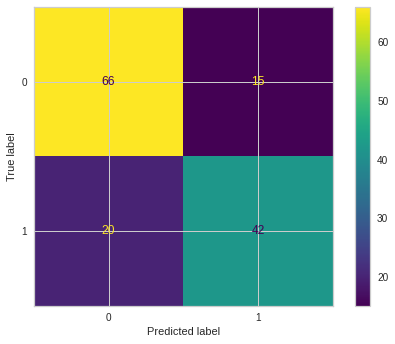

In [95]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()

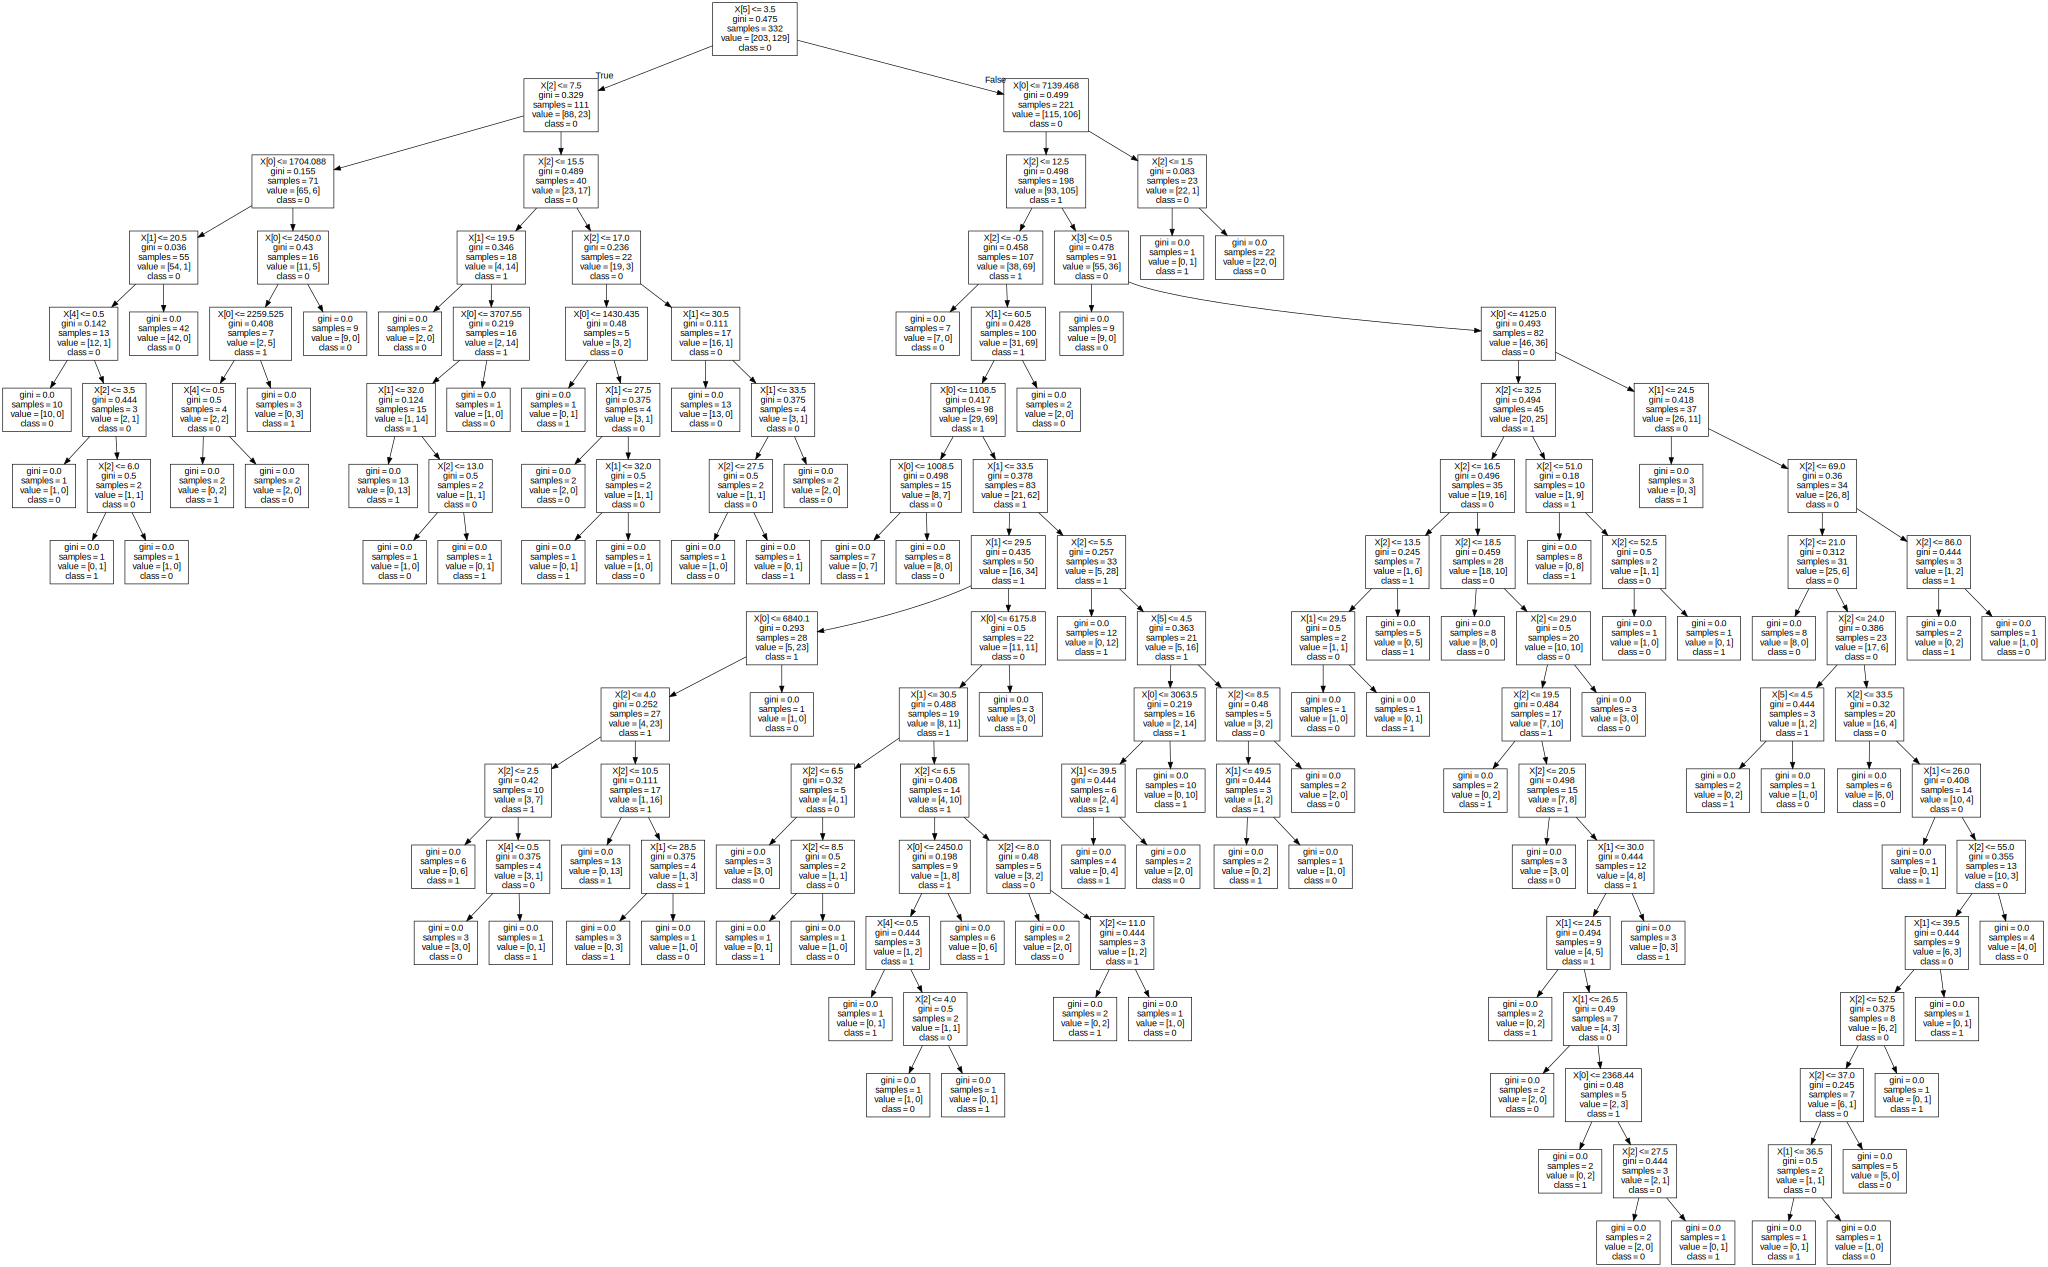

In [96]:
dot_data = export_graphviz(dt, out_file=None, class_names=list(map(str, dt.classes_))) 
graph = graphviz.Source(dot_data)
graph.render('ArvoreDeDecisão.pdf')
graph

In [97]:
print(precision_score(y_test, y_pred))

0.7368421052631579


In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        81
           1       0.74      0.68      0.71        62

    accuracy                           0.76       143
   macro avg       0.75      0.75      0.75       143
weighted avg       0.75      0.76      0.75       143



In [99]:
print(recall_score(y_test, y_pred))

0.6774193548387096


# 10. Naive Bayes

O algoritmo com o Teorema de Bayes’ cria uma tabela de probabilidade e calcula a partir dela o que tem maior probabilidade de ocorrer. Para a criação do modelo usamos no primeiro teste os seguintes dados, “Cargo”, “Estado civil”, “Escolaridade” e “Área”;
Após a escolha das variáveis tivemos que definir qual seria o dado a ser premeditado a partir do algoritmo. Como queremos saber se a pessoa irá permanecer ou sair da empresa, usamos como variável alvo a coluna nomeada como “Tipo saída” (caso seja true, a pessoa saiu ou tem tendência a sair, caso seja false a pessoa permanece na empresa).


In [100]:
# definimos quais colunas (variáveis) serão usadas (atributos previsores)
x_tipo_saida = df_everymind[['Cargo', 'Estado Civil', 'Escolaridade ', 'Area']].values 
x_tipo_saida

array([['DevPl', 'Casado', 'Superiorincompleto', 'Produtos'],
       ['DevPl', 'Solteiro', 'Graduação', 'Core&IndustriasII'],
       ['DevPl', 'Solteiro', 'PósGraduação', 'Core&IndustriasII'],
       ...,
       ['DevJr', 'Solteiro', 'PósGraduação', 'Integration'],
       ['DevPl', 'Solteiro', 'Superiorincompleto', 'Commerce'],
       ['DevEspecialista', 'Casado', 'Graduação', 'Analytics']],
      dtype=object)

In [101]:
# Seleciona qual será a variável a ser premeditada (coluna tipo saída, o atributo alvo)
y_tipo_saida = df_everymind.iloc[:, 4].values


In [102]:
#importamos sklearn 
#Transformamos o que é string em numeral
from sklearn.preprocessing import LabelEncoder
label_encoder_cargo = LabelEncoder()
label_encoder_estadocivil = LabelEncoder()
label_encoder_escolaridade = LabelEncoder()
label_encoder_area = LabelEncoder()

In [103]:
#Reorganizamos os dados na tabela x_tipo_saida
x_tipo_saida[:,0] = label_encoder_cargo.fit_transform(x_tipo_saida[:,0])
x_tipo_saida[:,1] = label_encoder_estadocivil.fit_transform(x_tipo_saida[:,1])
x_tipo_saida[:,2] = label_encoder_escolaridade.fit_transform(x_tipo_saida[:,2])
x_tipo_saida[:,3] = label_encoder_area.fit_transform(x_tipo_saida[:,3])

In [104]:
x_tipo_saida

array([[10, 0, 5, 21],
       [10, 3, 2, 12],
       [10, 3, 4, 12],
       ...,
       [9, 3, 4, 17],
       [10, 3, 5, 9],
       [8, 0, 2, 2]], dtype=object)

In [105]:
# Dividimos entre tabela de treino e de teste

x_treino, x_teste, y_treino, y_teste = train_test_split(x_tipo_saida, y_tipo_saida, test_size = 0.3, random_state = 1)

In [106]:
# Analisamos o tamanho das tabelas criadas

x_teste.shape, y_teste.shape, x_treino.shape, y_treino.shape

((143, 4), (143,), (332, 4), (332,))

In [107]:
# import pickle
# with open('risco_credito.pkl', 'wb') as f:
#  pickle.dump([x_tipo_saida, y_tipo_saida], f)

# with open('credit.pkl', 'rb') as f:  
#  x_treino, y_treino, x_teste, y_teste = pickle.load(f)

In [108]:
# Instanciamos o GaussianNB, que possibilita a aplicação do Bayes, para uso na tabela de teste
naive_tipo_saida = GaussianNB()
naive_tipo_saida.fit(x_teste, y_teste)

GaussianNB()

In [109]:
# cargo = 10; estadocivil = 0; escolaridade = 3; area = 0;
# cargo = 8; estadocivil = 3; escolaridade = 0; area = 3;
previsao = naive_tipo_saida.predict([[10,0,3,0], [8,3,0,3]])
previsoes = naive_tipo_saida.predict(x_teste)
previsao

array(['ColaboradorAtivo', 'PedidodeDemissão'], dtype='<U28')

In [110]:
accuracy_score(y_teste, previsoes)
# Cálculamos a acurácia

0.5734265734265734

In [111]:
confusion_matrix(y_teste, previsoes)

# Fazemos a matriz de confusão

array([[71,  0, 14,  5,  0],
       [ 6,  0,  2,  3,  0],
       [17,  0,  9,  6,  0],
       [ 0,  0,  0,  2,  0],
       [ 6,  0,  1,  1,  0]])

0.5734265734265734

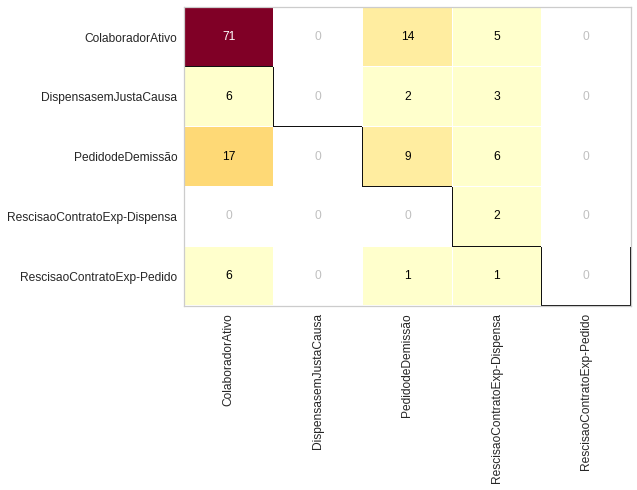

In [112]:
cm = ConfusionMatrix(naive_tipo_saida)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

# Usamos o yellowbrick classifier para ter uma matriz de confusão mais didática 

# 12.  RandomForest

Random Forest irá criar muitas árvores de decisão, de maneira aleatória, formando o que podemos enxergar como uma floresta, onde cada árvore será utilizada na escolha do resultado final, em uma espécie de votação.
No RandomForest a definição desta variável não acontece com base em todas as variáveis disponíveis. O algoritmo irá escolher de maneira aleatória (random) duas ou mais variáveis, e então realizar os cálculos com base nas amostras selecionadas, para definir qual dessas variáveis será utilizada no primeiro nó.

0.5664335664335665

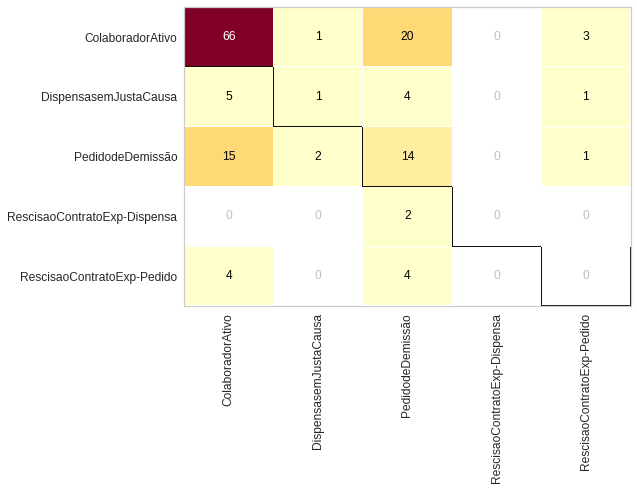

In [113]:
# model = RandomForestClassifier(n_estimators=10, random_state=0, oob_score=True, max_features=4)
# model.fit(x_treino, y_treino)
# plot_confusion_matrix(model,x_teste,y_teste, cmap='Blues')

random_forest = RandomForestClassifier(n_estimators=40, criterion='entropy', random_state = 0)
random_forest.fit(x_treino, y_treino)

cm = ConfusionMatrix(random_forest)
cm.fit(x_treino, y_treino)
cm.score(x_teste, y_teste)

In [114]:
previsoes_forest = random_forest.predict(x_teste)
previsoes_forest

array(['ColaboradorAtivo', 'ColaboradorAtivo', 'PedidodeDemissão',
       'ColaboradorAtivo', 'ColaboradorAtivo', 'ColaboradorAtivo',
       'PedidodeDemissão', 'RescisaoContratoExp-Pedido',
       'PedidodeDemissão', 'PedidodeDemissão', 'PedidodeDemissão',
       'PedidodeDemissão', 'ColaboradorAtivo', 'ColaboradorAtivo',
       'ColaboradorAtivo', 'PedidodeDemissão', 'ColaboradorAtivo',
       'ColaboradorAtivo', 'ColaboradorAtivo', 'ColaboradorAtivo',
       'PedidodeDemissão', 'ColaboradorAtivo', 'PedidodeDemissão',
       'PedidodeDemissão', 'PedidodeDemissão', 'ColaboradorAtivo',
       'ColaboradorAtivo', 'ColaboradorAtivo', 'ColaboradorAtivo',
       'ColaboradorAtivo', 'PedidodeDemissão',
       'RescisaoContratoExp-Pedido', 'PedidodeDemissão',
       'PedidodeDemissão', 'ColaboradorAtivo', 'ColaboradorAtivo',
       'PedidodeDemissão', 'PedidodeDemissão', 'ColaboradorAtivo',
       'ColaboradorAtivo', 'PedidodeDemissão', 'DispensasemJustaCausa',
       'ColaboradorAtivo', 'Co

In [115]:
accuracy_score(y_teste, previsoes_forest)

0.5664335664335665

In [116]:
print(classification_report(y_teste, previsoes_forest))

                              precision    recall  f1-score   support

            ColaboradorAtivo       0.73      0.73      0.73        90
       DispensasemJustaCausa       0.25      0.09      0.13        11
            PedidodeDemissão       0.32      0.44      0.37        32
RescisaoContratoExp-Dispensa       0.00      0.00      0.00         2
  RescisaoContratoExp-Pedido       0.00      0.00      0.00         8

                    accuracy                           0.57       143
                   macro avg       0.26      0.25      0.25       143
                weighted avg       0.55      0.57      0.55       143



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 13. K Nearest Neighbor

O KNN é um algoritmo não paramétrico, onde a estrutura do modelo será determinada pelo dataset utilizado, ou seja, o conjunto de dados será determinado de acordo com a distância dos “vizinhos” mais próximos. Este algoritmo também é conhecido como de aprendizado lento ou melhor dizendo, é um algoritmo com um tempo de resposta mais demorado quando comparado aos demais, que também utilizam aprendizado supervisionado.

In [117]:
# Criação de dataframe com os atributos utilizados
knnPd = pd.DataFrame()
knnPd = pd.concat([knnPd, monthlySalary], axis=1)
knnPd = pd.concat([knnPd, one_hot_cargos], axis=1)
knnPd = pd.concat([knnPd, one_hot_civil], axis=1)
knnPd = pd.concat([knnPd, one_hot_estado], axis=1)
knnPd = pd.concat([knnPd, age], axis=1)

In [118]:
# Separação treino e teste
from sklearn.model_selection import train_test_split

# Dividindo x e y
x_knn = knnPd
y_knn = df_everymind[['Saiu']]

# Dividindo dados para treino e dados para teste
x_knn_train, x_knn_test, y_knn_train, y_knn_test = train_test_split(x_knn, y_knn, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

In [119]:
# Normalização dos dados
from sklearn.preprocessing import MinMaxScaler

# Instaciando o objeto scaler
scaler = MinMaxScaler()

# Fit + transform no conjunto de treino
# Utilizando explicitamente as colunas de ambos os lados força que o
# resultado da normalização ainda seja o dataframe (muito mais facil de manipular) e não um numpy array
x_knn_train = scaler.fit_transform(x_knn_train)

# Agora utilizando o scaler no conjunto de teste
# Utilizar apenas o transform, pois fit é só no conjunto de treino,
# o conjunto de teste é utilizado para medir a capacidade de generalização do modelo no mundo real (dados não vistos)
# então faz sentido que a mesma normalização treinada e submetida ao conjunto de treino seja apenas aplicada no de teste
x_knn_test = scaler.transform(x_knn_test)

In [120]:
# Aplicação do modelo
from sklearn.neighbors import KNeighborsClassifier

# Instaciação do obj Algoritmo
knn = KNeighborsClassifier(n_neighbors=9)
# Treino # x = Features, y = Label/Target
knn.fit( x_knn_train, y_knn_train.squeeze() ) # squeeze() -> df para series

KNeighborsClassifier(n_neighbors=9)

In [121]:
# Teste de Acuracidade (accuracy)
print('Acuracidade (treino): ', knn.score( x_knn_train, y_knn_train ))
print('Acuracidade (teste): ', knn.score( x_knn_test, y_knn_test ))
# realizando predições com o conjunto de teste
y_knn_pred = knn.predict(x_knn_test)
# probabilidade de cada classe
y_knn_prob = knn.predict_proba(x_knn_test)

Acuracidade (treino):  0.7168674698795181
Acuracidade (teste):  0.6223776223776224


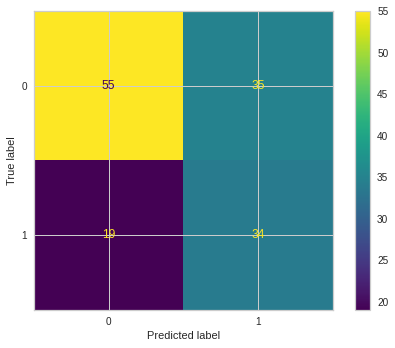

In [122]:
# Matriz de confusão
y_knn_true = y_knn_test
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_knn_true, y_knn_pred)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# versão visual mais bonita da matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

In [123]:
# Report de classificação
from sklearn.metrics import classification_report
print(classification_report(y_knn_test, y_knn_pred))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        90
           1       0.49      0.64      0.56        53

    accuracy                           0.62       143
   macro avg       0.62      0.63      0.61       143
weighted avg       0.65      0.62      0.63       143



# 14. Support Vector Machine

 A Support Vector Machines (Máquinas de Vetores de Suporte) é um conjunto de métodos de aprendizado supervisionado usado para classificação, regressão e detecção de outliers. Uma SVM constrói um hiperplano ou conjunto deles em um espaço dimensional, que pode ser usado para classificação, regressão ou outras tarefas e distribui os dados de treino de acordo com suas classificações.

0.5804195804195804
              precision    recall  f1-score   support

           0       0.69      0.60      0.64        90
           1       0.45      0.55      0.49        53

    accuracy                           0.58       143
   macro avg       0.57      0.57      0.57       143
weighted avg       0.60      0.58      0.59       143



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixD

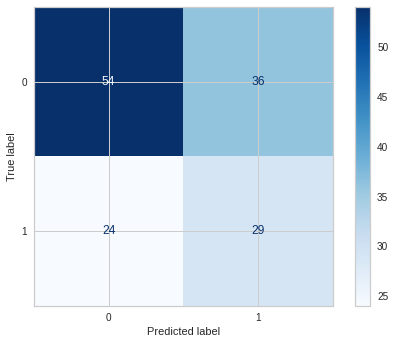

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
# Criando a tabela que será usada na aplicação do algoritmo SVM
test_table = pd.DataFrame()
#test_table = pd.concat([arvoree, df_everymind['Matrícula']], axis = 1)
#test_table = pd.concat([arvoree, df_everymind['PessoaColaboradora']], axis = 1)
test_table = pd.concat([arvoree,df_everymind['Salario Mês']], axis = 1)
test_table = pd.concat([arvoree,df_everymind['Idade']], axis = 1)
test_table = pd.concat([arvoree,df_everymind['mediaTempoPromoção']], axis = 1)
test_table = pd.concat([arvoree,df_everymind['NumeroMeses']], axis = 1)
test_table = pd.concat([arvoree,df_esco_atual], axis = 1)
# Dividindo x e y
x = test_table
y = df_everymind[['Saiu']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
# Utilizando o algoritmo e dados de treino, preparamos o algoritmo de predição
svm_test = svm.SVC()
svm_test.fit(x_train, y_train)
# Aplicamos os dados de teste e verificamos a confiabilidade das predições
svm_classifier_prediction = svm_test.predict(x_test)
print(accuracy_score(y_test, svm_classifier_prediction))
print(classification_report(y_test, svm_classifier_prediction))
# Cria a matriz de confusão conforme as classificações
plot_confusion_matrix(svm_test, x_test, y_test, cmap='Blues')

# 15. Regressão Logística

Modelo classificatório de aprendizado supervisionado, nesse caso regressão logística binária, que tem como função categorizar alguma variável por classes. Primeiro é aplicado a transformação linear para que os valores se tornem probabilidades, então é utilizado a função logística (sigmóide) para criar uma função em ‘S’ no gráfico e classificar as variáveis.

In [125]:
# Criação de dataframe com os atributos utilizados
RLPd = pd.DataFrame()
RLPd = pd.concat([RLPd, monthlySalary], axis=1)
RLPd = pd.concat([RLPd, one_hot_cargos], axis=1)
RLPd = pd.concat([RLPd, one_hot_civil], axis=1)
RLPd = pd.concat([RLPd, one_hot_estado], axis=1)
RLPd = pd.concat([RLPd, age], axis=1)
RLPd = pd.concat([RLPd, companyTime], axis=1)

In [126]:
# Separação de treino e teste dos dados
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

x_rl = RLPd
y_rl = df_everymind[['Saiu']]

x_rl_train, x_rl_test, y_rl_train, y_rl_test = train_test_split(x_rl, y_rl, 
                                                    test_size = 0.3, 
                                                    random_state = 1)
# Treinando o modelo
rlg = LogisticRegression().fit(x_rl_train, y_rl_train)

# Fazendo as predições
y_rl_pred = rlg.predict(x_rl_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


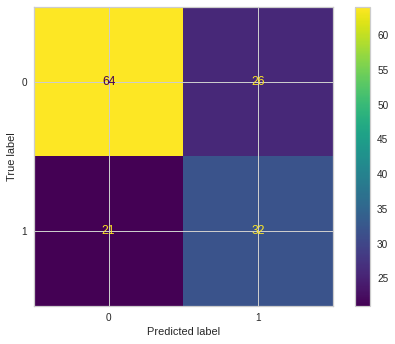

In [127]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_rl_test, y_rl_pred)
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, 
                              display_labels=knn.classes_)

disp.plot()
plt.show()

In [128]:
# Report de classificação
from sklearn.metrics import classification_report
print(classification_report(y_rl_test, y_rl_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73        90
           1       0.55      0.60      0.58        53

    accuracy                           0.67       143
   macro avg       0.65      0.66      0.65       143
weighted avg       0.68      0.67      0.67       143

